In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from matplotlib import font_manager, rc  
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

##### Time Series

In [24]:
dates = pd.date_range('2016-05-01', '2016-05-07')
dates

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07'],
              dtype='datetime64[ns]', freq='D')

In [25]:
#수학점수 데이터 만들기
tmp1=pd.Series([80,92,82,85,97,84,78], index=dates)
tmp1

2016-05-01    80
2016-05-02    92
2016-05-03    82
2016-05-04    85
2016-05-05    97
2016-05-06    84
2016-05-07    78
Freq: D, dtype: int64

In [26]:
#철학점수 데이터 만들기
#tmp2=pd.Series(np.random.randint(1,100, size=7), index=dates)
tmp2=pd.Series(np.random.randint(1,100, 7), index=dates)
tmp2

2016-05-01    34
2016-05-02    39
2016-05-03    93
2016-05-04    38
2016-05-05    81
2016-05-06    44
2016-05-07    57
Freq: D, dtype: int32

In [27]:
#tmp1, tmp2 이용해서 datafrme 만들기
exam=pd.DataFrame({'Math' : tmp1, 'Philosophy' : tmp2}) 
exam

,Math,Philosophy
2016-05-01,80,34
2016-05-02,92,39
2016-05-03,82,93
2016-05-04,85,38
2016-05-05,97,81
2016-05-06,84,44
2016-05-07,78,57


In [28]:
#2016년 5월 5d일 점수만 보기
exam.loc['2016-05-05']

Math          97
Philosophy    81
Name: 2016-05-05 00:00:00, dtype: int64

In [33]:
#5/4, 5/6, 5/7의 철학 점수만 보기
exam['Philosophy'][[3,5,6]]

2016-05-04    38
2016-05-06    44
2016-05-07    57
Name: Philosophy, dtype: int32

In [40]:
def min(a,b):
    result=a-b
    return result

min(3,5)


-2

In [42]:
a=exam.Math-exam.Philosophy
a

2016-05-01    46
2016-05-02    53
2016-05-03   -11
2016-05-04    47
2016-05-05    16
2016-05-06    40
2016-05-07    21
Freq: D, dtype: int64

In [43]:
exam['difference']=a
exam

,Math,Philosophy,difference
2016-05-01,80,34,46
2016-05-02,92,39,53
2016-05-03,82,93,-11
2016-05-04,85,38,47
2016-05-05,97,81,16
2016-05-06,84,44,40
2016-05-07,78,57,21


In [44]:
#컬럼 이름 바꾸기
exam.rename(columns={'Math':'Mathmatics', 'difference':'diff'}, inplace=True)
exam.columns

Index(['Mathmatics', 'Philosophy', 'diff'], dtype='object')

In [48]:
#exam에서 'diff' 칼럼을 지워주세요
exam.drop('diff', axis=1, inplace=True)
exam

,Mathmatics,Philosophy
2016-05-01,80,34
2016-05-02,92,39
2016-05-03,82,93
2016-05-04,85,38
2016-05-05,97,81
2016-05-06,84,44
2016-05-07,78,57


In [50]:
#and, or 중 하나 사용 (&, |)
#5/3, 5/4의 시험 점수를 데이터프레임 형태로 가져오세요
exam[(exam.index=='2016-05-03')|(exam.index=='2016-05-04')]

,Mathmatics,Philosophy
2016-05-03,82,93
2016-05-04,85,38


In [54]:
#and, or 중 하나 사용 (&, |)
#수학점수가 85이상
#5/1~5/5 이전의 날짜
exam[(exam.Mathmatics>=85)&(exam.index<='2016-05-05')]

,Mathmatics,Philosophy
2016-05-02,92,39
2016-05-04,85,38
2016-05-05,97,81


In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:>

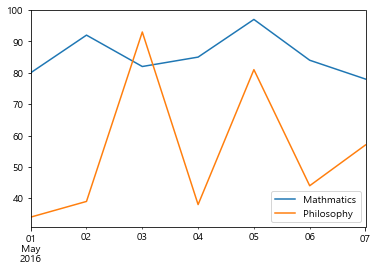

In [56]:
exam.plot()

Text(0, 0.5, 'Score')

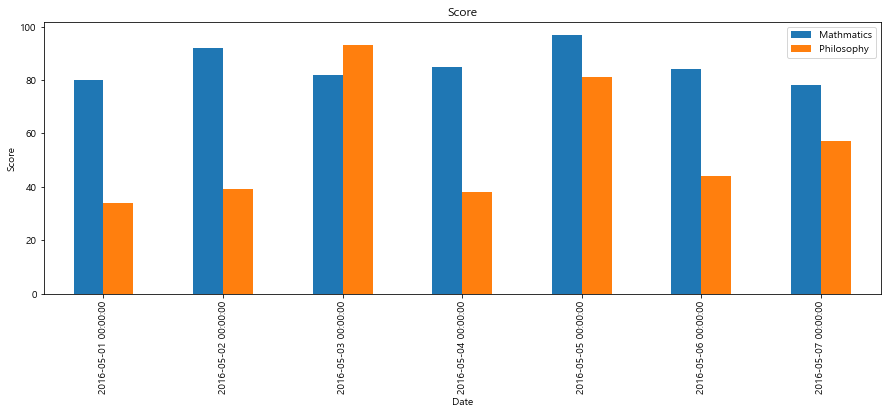

In [60]:
exam.plot(title='Score', figsize=(15,5), kind='bar')
plt.xlabel('Date')
plt.ylabel('Score')